# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np

In [0]:
def mvstd(nums):
  mean = sum(nums) / len(nums)
  
  variance = sum([(i - mean) ** 2 for i in nums]) / (len(nums))
  
  std_dev = variance ** .5
    
  return mean, variance, std_dev

In [113]:
mean_sales, var_sales, std_dev_sales = mvstd(sales)
mean_sales, var_sales, std_dev_sales

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [114]:
num_cust = [127, 80, 105, 92, 120, 115, 93]
mean_cust, var_cust, std_dev_cust = mvstd(num_cust)
mean_sales, mean_cust

(3052.714285714286, 104.57142857142857)

In [133]:
cov = 0
for i in range(len(sales)):
  cov += (sales[i] - mean_sales) * (num_cust[i] - mean_cust)
  
cov = cov / (len(sales))
print(cov)

6518.020408163265


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [134]:
corr = cov / (std_dev_sales * std_dev_cust)
corr

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [149]:
df_n = df.select_dtypes(np.number)
df_n = df_n.drop(['body', 'Unnamed: 0'], axis=1)
df_n.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [151]:
df_n.corr(), df_n.cov()

(                    pclass  survived  ...      fare  has_cabin_number
 pclass            1.000000 -0.312469  ... -0.558629         -0.713857
 survived         -0.312469  1.000000  ...  0.244265          0.302250
 age              -0.366370 -0.050199  ...  0.171892          0.271887
 sibsp             0.060832 -0.027825  ...  0.160238         -0.009064
 parch             0.018322  0.082660  ...  0.221539          0.036806
 fare             -0.558629  0.244265  ...  1.000000          0.507253
 has_cabin_number -0.713857  0.302250  ...  0.507253          1.000000
 
 [7 rows x 7 columns],
                      pclass  survived  ...         fare  has_cabin_number
 pclass             0.701969 -0.127248  ...   -24.227788         -0.249992
 survived          -0.127248  0.236250  ...     6.146023          0.061406
 age               -3.954605 -0.314343  ...   114.416613          1.463138
 sibsp              0.053090 -0.014088  ...     8.641768         -0.003946
 parch              0.013287  0.

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

0


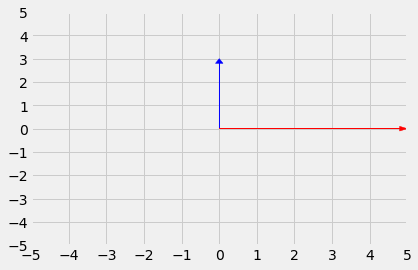

In [175]:
vector1 = np.array([0, 3])
vector2 = np.array([5, 0])
print(np.dot(vector1, vector2))
plt.style.use('fivethirtyeight')
plt.arrow(0, 0, vector1[0], vector1[1], color='b',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.arrow(0, 0, vector2[0], vector2[1], color='r',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.xticks([i for i in range(-5, 6)])
plt.yticks([i for i in range(-5, 6)]);

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [156]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
print(np.dot(a, b))
print('These two vectors are not orthogonal because their dot product isn\'t 0')

-40
These two vectors are not orthogonal because their dot product isn't 0


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [181]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(np.dot(c, c))
print(np.transpose(c) * c)
print('''The first two are equal to each other and
the sum of the values in the last one
is also equal to the first two''')

665.0
665
[  4 225  36 400]
The first two are equal to each other and
the sum of the values in the last one
is also equal to the first two


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [182]:
f = np.array([4, 12, 11, 9, 2])
print(f / np.linalg.norm(f))

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

26


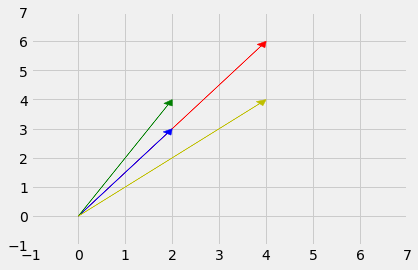

In [189]:
vector1 = np.array([2, 3])
vector2 = np.array([4, 6])
vector3 = np.array([2, 4])
vector4 = np.array([4, 4])
print(np.dot(vector1, vector2))
plt.style.use('fivethirtyeight')

plt.arrow(0, 0, vector2[0], vector2[1], color='r',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.arrow(0, 0, vector1[0], vector1[1], color='b',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.arrow(0, 0, vector3[0], vector3[1], color='g',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.arrow(0, 0, vector4[0], vector4[1], color='y',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.xticks([i for i in range(-1, 8)])
plt.yticks([i for i in range(-1, 8)]);

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [190]:
print('Any point in 1 dimensional space')

Any point in 1 dimensional space


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [191]:
print('Any point in 3 dimensional space')

Any point in 3 dimensional space


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



0


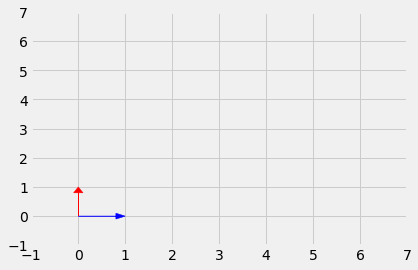

In [192]:
vector1 = np.array([1, 0])
vector2 = np.array([0, 1])
print(np.dot(vector1, vector2))
plt.style.use('fivethirtyeight')

plt.arrow(0, 0, vector2[0], vector2[1], color='r',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)

plt.arrow(0, 0, vector1[0], vector1[1], color='b',
          length_includes_head=True,
          head_width=.2,
          head_length=.2)


plt.xticks([i for i in range(-1, 8)])
plt.yticks([i for i in range(-1, 8)]);

## 6.2 What does it mean to form a basis?

Any set of vectors that are linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [194]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It's in 3 dimensional space

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [195]:
v = np.array([1, 3])
w = np.array([-1, 2])

np.dot(((np.dot(w, v)) / (np.dot(v, v))), v)

array([0.5, 1.5])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

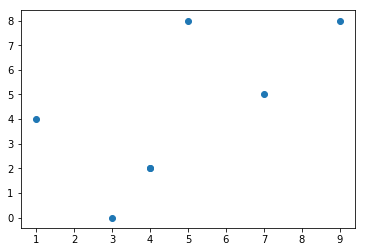

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()